## **Curso de Especialização em Inteligência Artificial e Computacional** 
**ELT 574 - Aprendizado de Máquinas**

**Aluna:** Carine Madeira Soares  
**Instituição:** Universidade Federal de Viçosa

#### Aula 01 - Introdução ao Aprendizado de Máquinas

In [27]:
# importando as bibliotecas
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

print('Setup completo!')

Setup completo!


### Aula 01 - Introdução aos problemas de aprendizado de máquinas

Na primeira aula da disciplina Aprendizado de Máquina foi apresentado as etapas de construção de um modelo de Machine Learning:

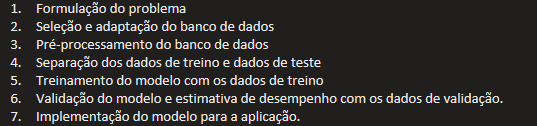

1. Formulação do problema

O desenvolvimento do nosso aprendizado de máquina tem como principal pergunta de négocio a estimação do valor médio de uma residência no estado da Califórnia, nos EUA.
Usaremos como fonte de dados um conjunto com as caracrteristicas das residências deste distrito.

Fonte: https://www.kaggle.com/datasets/camnugent/california-housing-prices/download?datasetVersionNumber=1 

Glossário do banco de dados:

* longitude: Longitude
* latitude: Latitude
* house_median_age: Idade média do imóvel
* total_room: Quantidade total de comôdos no quarteirão
* total_bedrooms: Quantidade total de quartos no quarteirão
* population: Quantidade de pessoas no quateirão
* households: Quantidade de moradias no quateirão
* median_income: Mediana dos rendimentos totais das famílias no quateirão (USD), mede o nível socioeconômico e a capacidade de compra das famílias daquela região
* median_house_value: Mediana do valor das casas no quarteirão
* ocean_proximity: Indice de distância aproximada do oceano near-ocean (próximo ao oceano), near-bay (próximo à baía), island (ilha), inland (interior) e <1h ocean (até uma hora do oceano)

2. Seleção e adaptação do banco de dados

In [3]:
path = r'C:\Users\ninam\Documents\Projetos\UFV\UFV\src\housing.csv'

df_housing = pd.read_csv(path)

In [4]:
df_housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


### Aula 02 -  Tipos de dados e tratamento de entradas

#### Tipos de dados: 
1. Qualitativos
 * Nominal 
 * Ordinários

2. Quantitativos
 * Discreto
 * Contínuo

In [5]:
# Explorando o banco de dados
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# Verificar informações das variáveis
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Conseguimos interpretar a partir do último comando que a variável total_bedrooms tem 207 valores ausentes e a única variavel categórica é a ocean_proximity

In [7]:
# Quais são as opções dentro da nossa variável categórica?
df_housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
# Quais as cinco locações que estão numa ilha?
df_housing.loc[df_housing['ocean_proximity'] == 'ISLAND']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND
8315,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND
8316,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND
8317,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND
8318,-118.48,33.43,29.0,716.0,214.0,422.0,173.0,2.6042,287500.0,ISLAND


In [9]:
# Destas casas que estão na ilha quais as que tem mais de 30 anos
df_housing.loc[(df_housing['ocean_proximity'] == 'ISLAND')&(df_housing['housing_median_age'] > 30)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8315,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND
8316,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND
8317,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND


#### Ferramentas para exploração de dados:

##### 1. Ferramentas descritivas
  * Medidas de tendências
    * Média
    * Mediana
    * Moda
 * Medidas de dispersão
    * Intervalo
    * Desvio padrão
 * Distribuição das frequências
 * Histogramas

In [10]:
# Medidas de tendência e dispersão
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


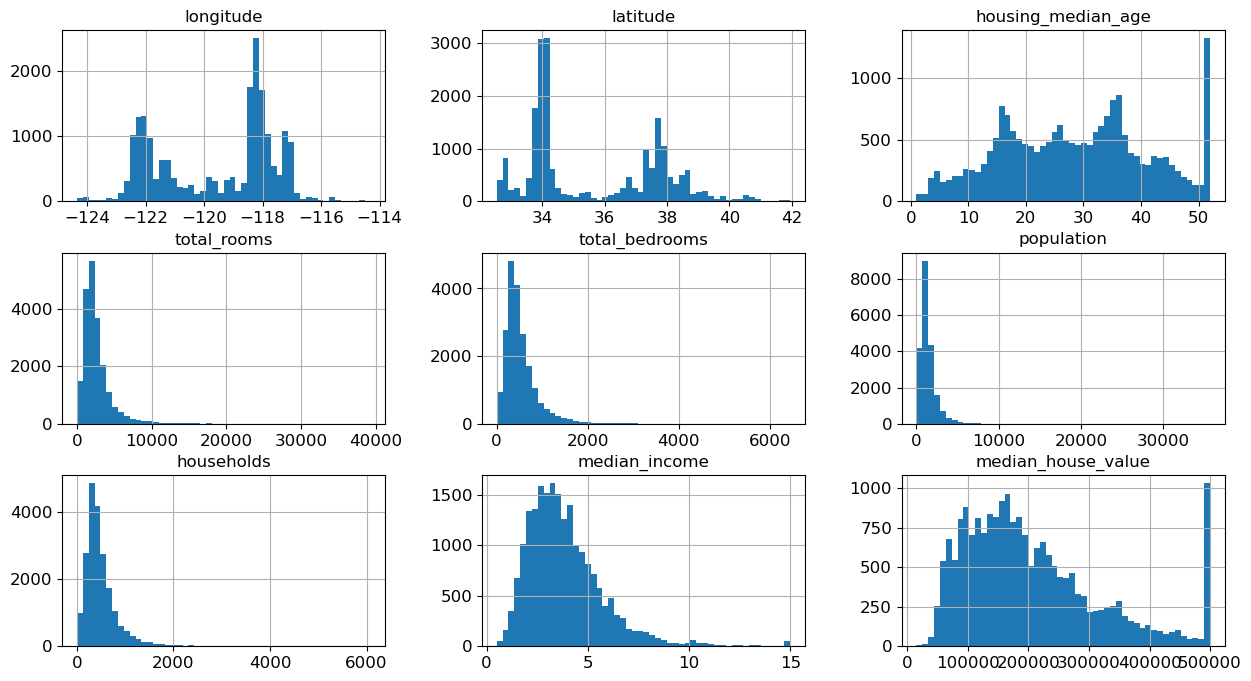

In [11]:
# Distribuição de frequências
df_housing.hist(bins=50, figsize=(15,8))
plt.show()

<Axes: xlabel='median_house_value', ylabel='Count'>

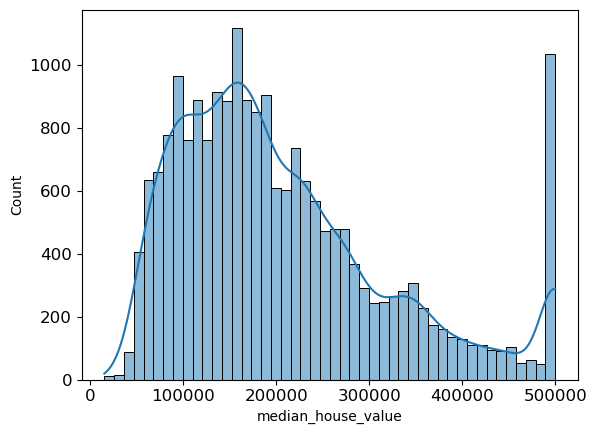

In [12]:
sns.histplot(data=df_housing, x='median_house_value',kde=True)

<Axes: xlabel='median_house_value', ylabel='Count'>

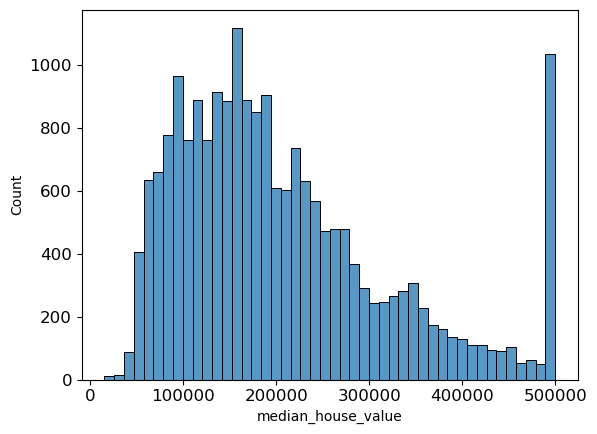

In [13]:
sns.histplot(data=df_housing, x='median_house_value',kde=False)


##### 2. Ferramentas de inferência
 * Teste de hipótese
 * Análise da variância (ANOVA)
 * Teste de chi-quadrado
 * Regressão linear
 
 ---

### Aula 03 - Relação entre variáveis e extração de características

#### Explorando os dados do problema

##### 1. Seleção das variáveis/características (feature selection)
 * Correlação entre as variáveis de entrada e saída
    * Análise gráfica
    * Coeficiente de correlação linear

<Axes: xlabel='longitude', ylabel='latitude'>

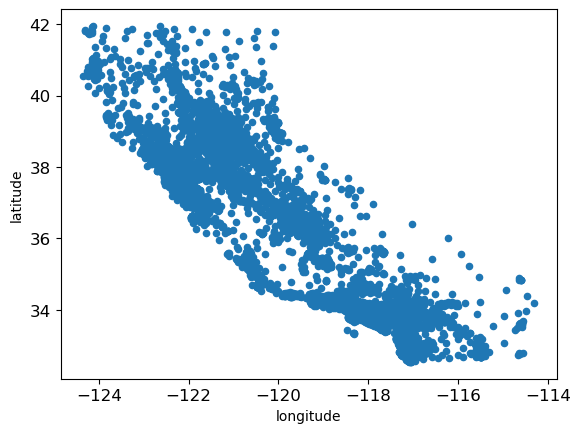

In [14]:
# gráfico com as posições gráficas das casas
df_housing.plot(kind='scatter', x='longitude', y='latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

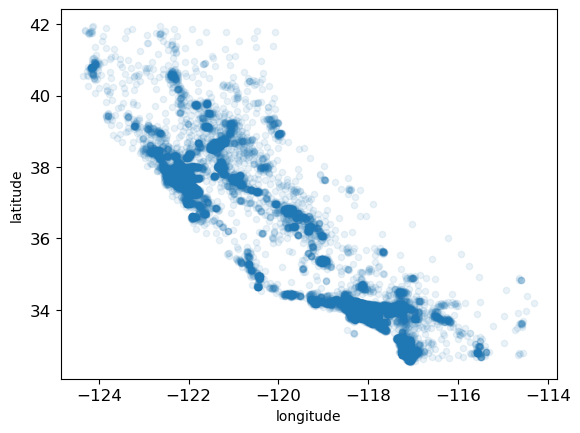

In [15]:
# gráfico com as posições gráficas das casas com 9% da cor
df_housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.09)

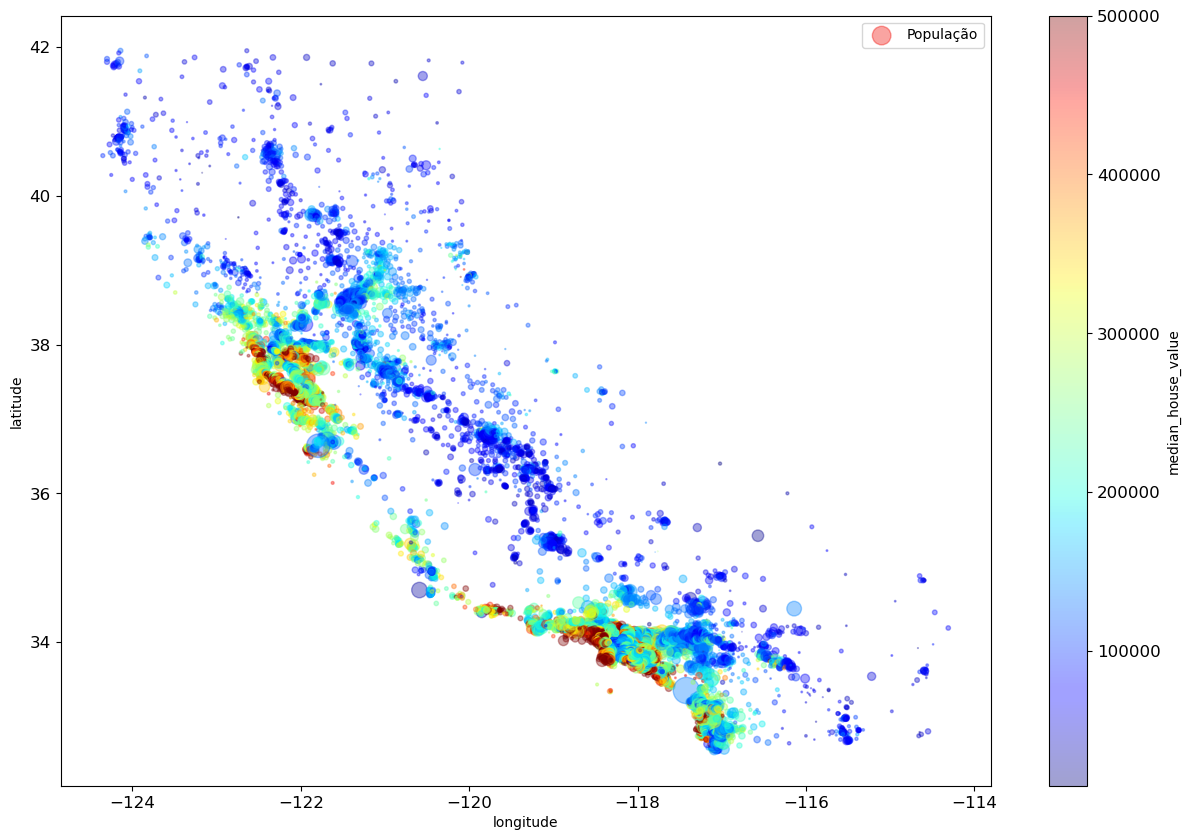

In [16]:
# gráfico geográfico das casas e marcadores com 37% da cor modulado pela
# população/100 e com a diferenciação da cor pelo valor da casa, sendo azul as
# casas mais baratas e vermelho as mais caras.
df_housing.plot(kind='scatter', 
                x='longitude', 
                y='latitude', 
                alpha=0.37, 
                s=df_housing['population']*0.01, 
                label='População',
                figsize=(15,10), 
                c='median_house_value', 
                cmap=plt.get_cmap('jet'),
                colorbar=True)
plt.legend()

O gráfico de dispersão por cor relacionado ao valor médio das casas indica dois pontos em que os imóveis tem valores mais elevados em comparação ao resto do estado. Conhecendo o mapa da Califórnia sabe-se que esses dois pontos são cidades de grande porte, em que a cidade com latitute, longitude próximos a 37.6,-121.8 é São Francisco com 874 Mil habitantes e com as coordenadas próximos à 34,-118.6 é Los Angeles com 10 Mi habitantes.

In [17]:
# Matriz de correlação
# Contém os coeficientes de correlação linear
corr_matriz = df_housing.corr()
corr_matriz

C:\Users\ninam\AppData\Local\Temp\ipykernel_5960\2378887535.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matriz = df_housing.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [18]:
# correlação das entradas com a saída desejada
corr_matriz['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Nesse caso, identificamos que a entrada que mais tem correlação é o 'median_income' com 68.8% de influência, relembrando que mensura o nível socioeconômico do quarteirão, o que faz sentido visto que nossa variável de saída desejada é o valor médio da residência.


A segunda característica que contém correlação mais forte, entretanto é uma correlação negativa, é a latitude, com o coeficiênte de linearidade de -14.4% de correlação. Considerando esse cenário é correto afirmar que quanto maior o valor da casa menor será a latitude e vice e versa. 

Em seguida, a terceira variável com maior correlação é a 'total_rooms' que é a quantidade de cômodos da casa, com 13.4% de relação. Nesse cenário, quanto maior a quantidade de cômodos maior o valor médio do imóvel.

E como quarta variável mais correlacionada linearmente com a 'housing_median_age', com coeficiênte linear de correlação de 10.6%, é a idade média da residência.

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

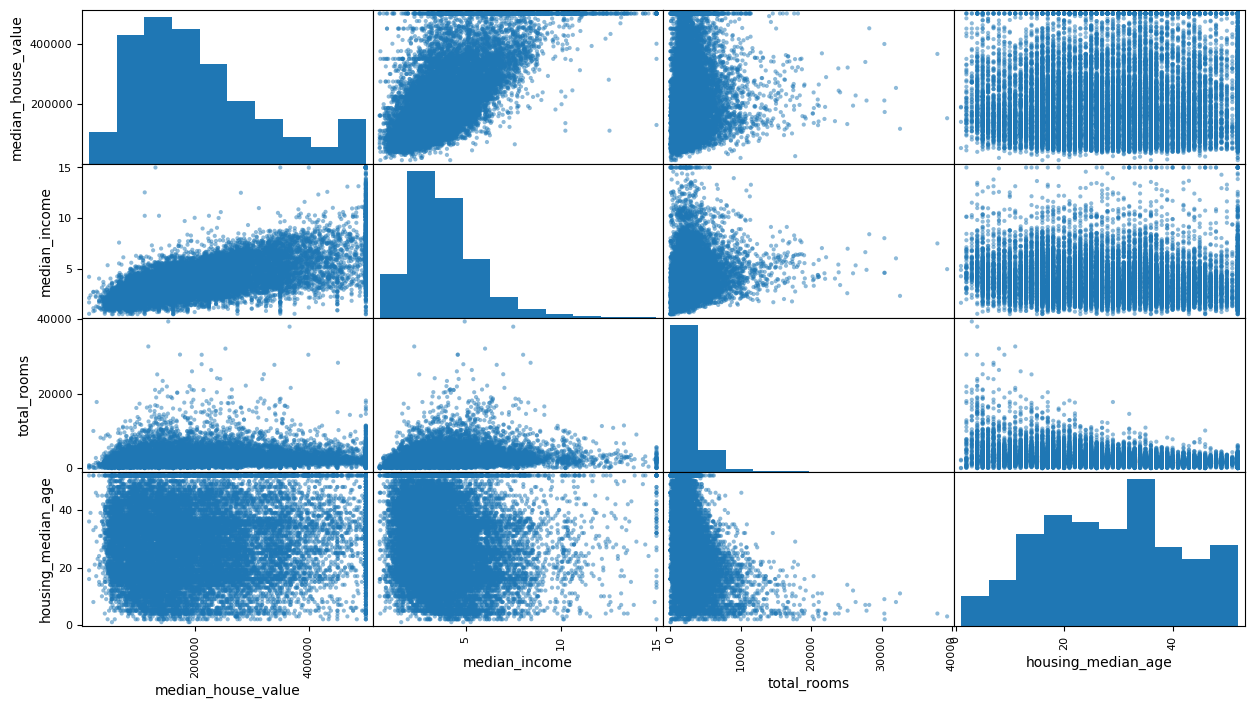

In [20]:
# gráficos de dispersão entre as variáveis com maiores correlações
atributos = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(df_housing[atributos], figsize=(15,8))

A correlação linear que conseguimos visualizar nos gráficos acima destaca que é melhor explicado quando compara-se as variáveis 'median_house_value' com 'median_income'.

<Axes: xlabel='median_income', ylabel='median_house_value'>

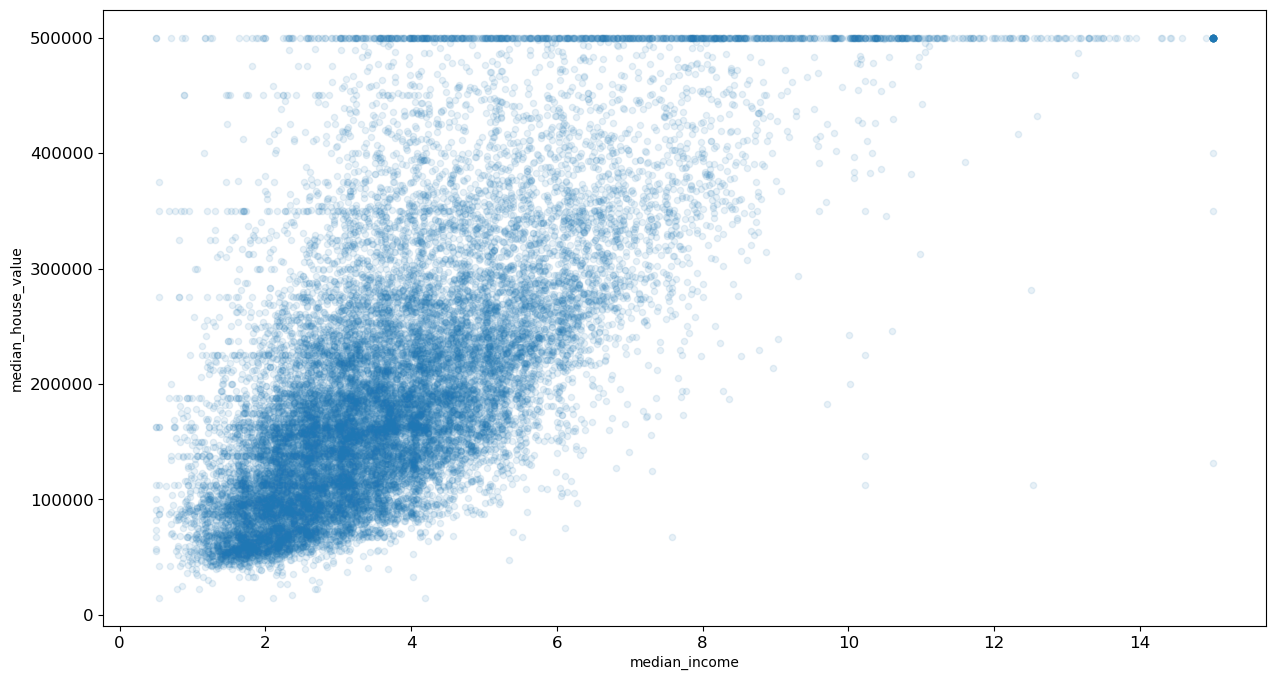

In [21]:
df_housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1, figsize=(15,8))

##### 2. Tratamento de variáveis categóricas

###### Transformação de variáveis categóricas em binárias (dummy)
 * **Cuidado ao transformar categóricas ordinárias**


In [22]:
# transformando variaveis categoricas em numericas

df_housing_cat = df_housing[['ocean_proximity']]

In [23]:
df_housing_cat.value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
dtype: int64

In [25]:
ordinal_encoder = OrdinalEncoder()
df_housing_cat_encoder = ordinal_encoder.fit_transform(df_housing_cat)
df_housing_cat_encoder

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [26]:
# categorias transformadas com o Ordinal Encoder
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [51]:
ordinal_encoder._parameter_constraints

{'categories': [<sklearn.utils._param_validation.StrOptions at 0x18eaada34c0>,
  list],
 'dtype': 'no_validation',
 'encoded_missing_value': [numbers.Integral, float],
 'handle_unknown': [<sklearn.utils._param_validation.StrOptions at 0x18eaada3460>],
 'unknown_value': [numbers.Integral, float, None]}

O ponto negativo do Ordinal Encoder é que o resultado da transformação são variáveis ordinárias, o que pode influênciar o desempenho do nosso modelo ao ponderar as variáveis diferentemente ou interpretá-las de forma crescente. Ou seja, o algoritmo pode entender que o encoder 5 é maior ou melhor que o 1, o que é uma inverdade.

In [28]:
# OneHotEncoding (dummies)

cat_OHE = OneHotEncoder()
df_housing_cat_OHE = cat_OHE.fit_transform(df_housing_cat)
df_housing_cat_OHE

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [29]:
#  matriz esparça
df_housing_cat_OHE.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [30]:
# categorias transformadas com o One Hot Encoder
cat_OHE.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

####  Remoção de variáveis que não acrescentam informações ao modelo
+  Variáveis com apenas um valor
+  Variáveis com muitos dados ausentes

In [53]:
# dados ausentes ou inválidos
df_housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [34]:
# Três metodos de limpeza e tratamento dos dados
df_housing_cleaning = df_housing

1. Excluir linhas que não tem informações do total de quartos

In [36]:
df_housing_cleaning.dropna(subset=['total_bedrooms'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


2. Exclui a coluna que traz a informação de total de quartos

In [37]:
df_housing_cleaning.drop('total_bedrooms', axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0,INLAND


3. Insere dados da mediana da coluna em questão nos valores nulos

In [45]:
df_housing['total_bedrooms'].mean()

536.8388565891473

In [41]:
# calcula a mediana dos dados validos
mediana = df_housing_cleaning['total_bedrooms'].median()
mediana

435.0

In [42]:
# substitui os valores ausentes pela mediana
df_housing_cleaning['total_bedrooms'].fillna(mediana, inplace=True)

#### 3. Extração e pré-processamento das variáveis
*Otimizar o número de variáveis sem perder desempenho do modelo*

##### Técnicas de pré-processamento e extração de características
 * Uniformização (xi'= (xi-u)/s): 
 ```
 from sklearn.preprocessing import StandardScaler
 ```
 * Normalização 
 ```
 from sklearn.preprocessing import MinMaxScaler
 ```
 * Melhoramento da relação sinal/ruído
 * Redução de dimensionalidade
  * Cada problema requer um método diferente. Depende da análise

### Combinação de variáveis?
- *É possível criar novas variáveis a partir das variáveis do problema?*

- As variáveis *total_bedrooms*, *total_rooms* e *population* sozinhas fazem algum sentido para quem vai comprar uma casa?

In [55]:
df_housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [56]:
# criar novas features para analisar o modelo
df_housing['rooms_per_household'] = df_housing['total_rooms']/df_housing['households']
df_housing['population_per_household'] = df_housing['population']/df_housing['households']

In [57]:
corr_matriz_feature = df_housing.corr()

C:\Users\ninam\AppData\Local\Temp\ipykernel_5960\1723783136.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matriz_feature = df_housing.corr()


In [58]:
corr_matriz_feature['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
Name: median_house_value, dtype: float64

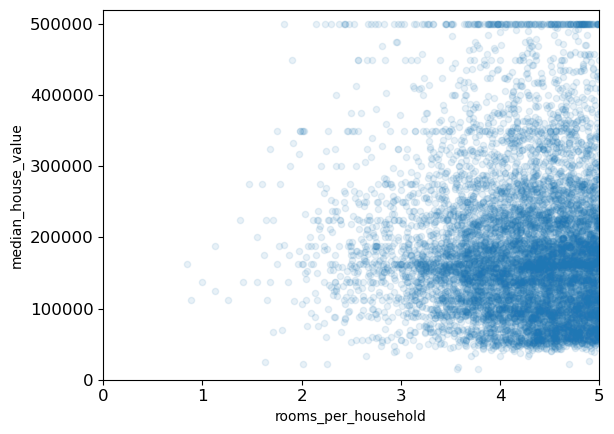

In [59]:
df_housing.plot(kind='scatter', x='rooms_per_household',y='median_house_value', alpha = 0.1)
plt.axis([0,5,0,520000])
plt.show()